In [24]:
# If the below code doesn't work uncomment this and run (this adds the parent directory to the path)
import sys
sys.path.insert(0,"C:\\Users\\Paolo\\.virtualenvs\\Internship2020-9r0W5TXr\\Lib\\site-packages")
sys.path.insert(1,"C:\\Users\\Paolo\\.virtualenvs\\Internship2020-9r0W5TXr")

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(2,parentdir)
sys.path.insert(3,"C:\\Users\\Paolo\\Google Drive\\Shared_Files\\3-Junior\\3-BW\\Project\\Internship2020\\Indicators")


from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

import statistics

import importlib
import Indicators.IndicatorUtilities as Util
importlib.reload(Util)

countries = CountryMetaDataFile().readMetadata()
dl = DataLib("SignalData")

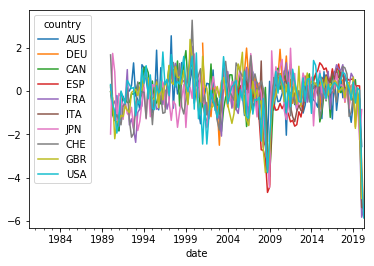

In [35]:
GDPReal = dl.pull("GDP/Real")
GDPReal_PctChange = Util.AnnualizedChangeTimeSeries(GDPReal, 'Q', 1)
GDPReal_PctChange_Normalized = Util.NormalizeDF(GDPReal_PctChange, 40)

GDPReal_PctChange_Normalized.plot()

plt.show()



In [26]:
BondPrices = dl.pull("BondRetIdx/LocalFX")

BondPrices_Quarterly = BondPrices.resample('1Q').first()

BondPrices_Quarterly = Util.AnnualizedChangeTimeSeries(BondPrices_Quarterly, 'Q', 1)

BondReturn_Future = BondPrices_Quarterly.shift(-1)

BondReturn_Future.tail()

country,AUS,DEU,CAN,ESP,FRA,ITA,JPN,CHE,GBR,USA
date,,,,,,,,,,
2019Q3,0.120770,0.093904,0.054493,0.088011,0.085224,0.476614,0.003467,0.030399,0.157267,0.186118
2019Q4,-0.108219,-0.138117,-0.099369,-0.107927,-0.123895,-0.133587,-0.044844,-0.079023,-0.118040,-0.083940
2020Q1,0.297610,0.124286,0.450743,-0.069422,0.043318,-0.043078,-0.008295,-0.075202,0.235359,0.746202
2020Q2,-0.069469,-0.018616,0.039260,0.109943,0.048428,0.111379,-0.013627,0.016811,0.043233,-0.022749
2020Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


country      AUS      DEU      CAN      ESP      FRA      ITA       JPN  \
date                                                                      
2019Q3   396.009  989.815  487.389  393.985  746.128  538.072  1562.560   
2019Q4   398.072  989.630  488.070  395.602  744.743  536.842  1533.550   
2020Q1   396.854  969.653  477.777  374.995  700.508  507.957  1524.984   
2020Q2       NaN  871.800      NaN  305.681  603.732  445.184       NaN   
2020Q3       NaN      NaN      NaN      NaN      NaN      NaN       NaN   

country      CHE      GBR       USA  
date                                 
2019Q3   170.763  732.355  4599.310  
2019Q4   171.340  732.354  4626.273  
2020Q1   166.873  716.336  4567.859  
2020Q2       NaN      NaN  4134.154  
2020Q3       NaN      NaN       NaN  


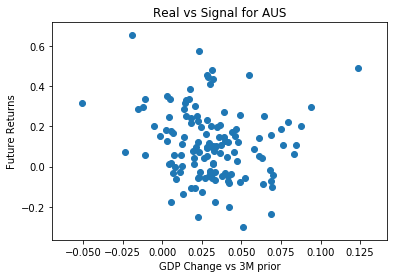

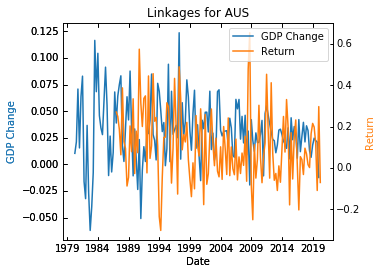

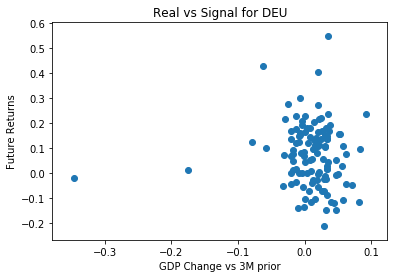

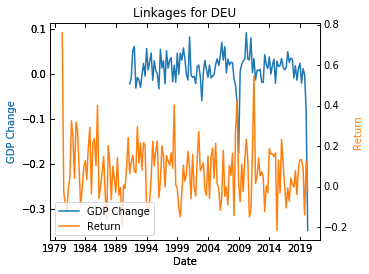

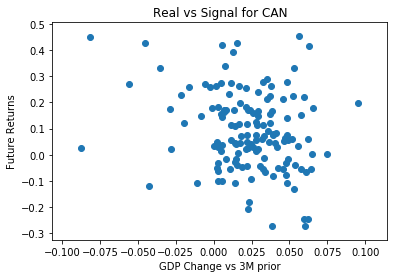

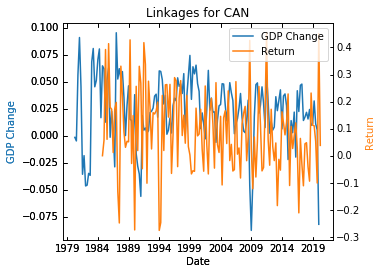

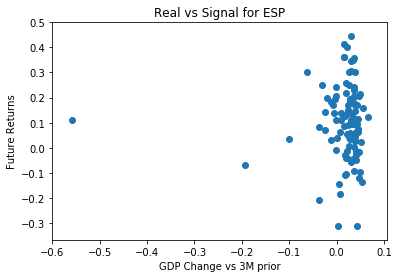

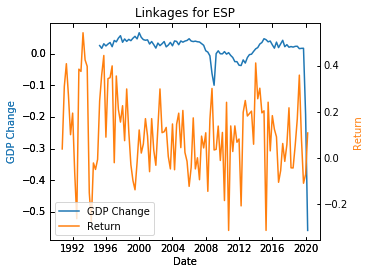

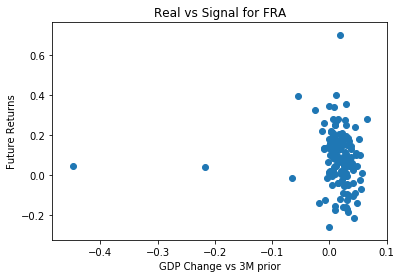

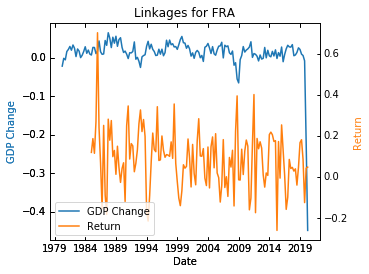

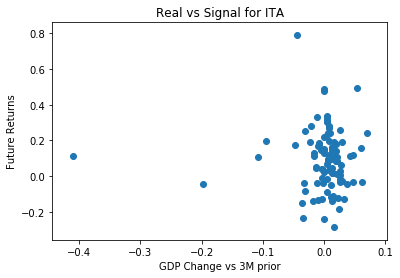

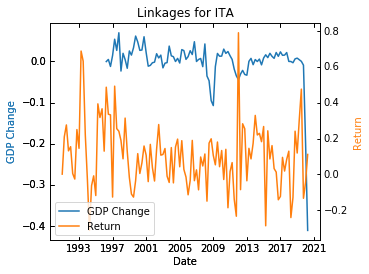

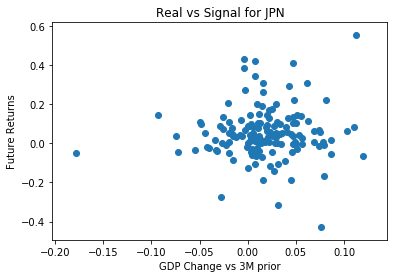

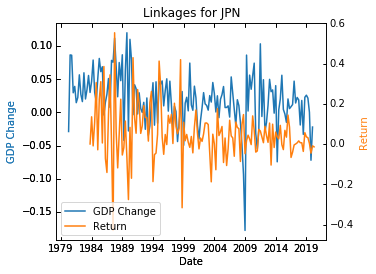

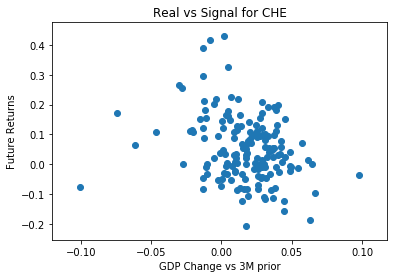

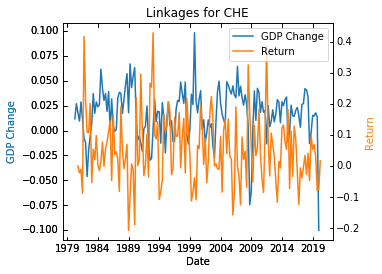

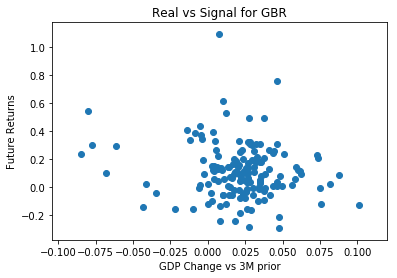

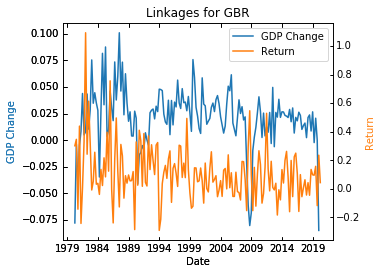

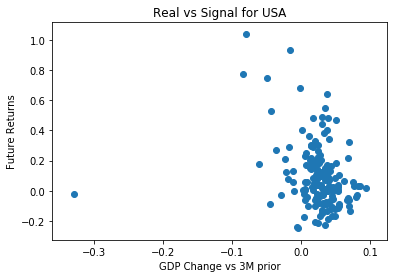

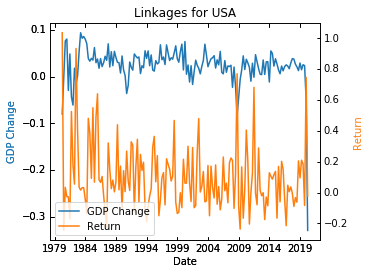

In [27]:
all_countries = GDPReal_PctChange.columns

print(GDPReal.tail())

for country in all_countries:
    temp = pd.DataFrame()
    
    temp['GDP Change'] = GDPReal_PctChange[country]   
    temp['Return'] = BondReturn_Future[country]
    
    plt.scatter(temp['GDP Change'], temp['Return'])
    plt.title("Real vs Signal for " + country)
    plt.xlabel('GDP Change vs 3M prior')
    plt.ylabel('Future Returns')
    plt.show()
    
    series0 = [temp['GDP Change'], "GDP Change", "GDP Change"]
    series1 = [temp['Return'], "Return", "Return"]

    Util.GraphDifferentAxes([series0, series1], "Linkages for " + country)


country       AUS       DEU       CAN       ESP       FRA       ITA       JPN  \
date                                                                            
2020-04 -0.032089 -0.003665 -0.006260 -0.003664 -0.003676 -0.003665 -0.004286   
2020-05 -0.055950 -0.031327 -0.030064 -0.031342 -0.031328 -0.031342  0.003153   
2020-06 -0.019387 -0.018184 -0.003764 -0.018214 -0.018221 -0.018215 -0.008079   
2020-07  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-08       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

country       CHE       GBR       USA  
date                                   
2020-04 -0.000309 -0.008864  0.015822  
2020-05 -0.020192  0.018374  0.011704  
2020-06 -0.017348  0.013173  0.035419  
2020-07  0.000000  0.000000  0.000000  
2020-08       NaN       NaN       NaN  
country       AUS       DEU       CAN       ESP       FRA       ITA       JPN  \
date                                                                   

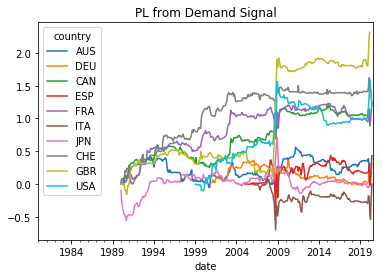

In [37]:
GDPReal_PctChange_Monthly = GDPReal_PctChange_Normalized.resample('1M').ffill()


GrowthSignal = - GDPReal_PctChange_Monthly


BondPrices = dl.pull("BondRetIdx/LocalFX")
FXvsUSD = dl.pull('fxVsUSD')

BondReturn_Daily = BondPrices.pct_change(1).shift(-1)
BondReturn_Monthly = BondReturn_Daily.resample('1M').sum()
fxVsUSD_Monthly = FXvsUSD.pct_change(1).shift(-1)
print(fxVsUSD_Monthly.tail())
print(BondReturn_Monthly.tail())

NetReturn = BondReturn_Monthly - fxVsUSD_Monthly

PL_Raw = NetReturn * GrowthSignal
PL_Total = PL_Raw.cumsum()

PL_Total.plot()
plt.title("PL from Demand Signal")
plt.show()